In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Prepare Data

### Read Data

In [2]:
orig = pd.read_csv('https://github.com/mostly-ai/public-demo-data/raw/dev/census/census.csv.gz')

### Split Data

In [3]:
trn, val = train_test_split(orig, test_size=0.5, random_state=123)

### Inject Missing Values

In [4]:
def mask(prob, col=None, cats=None):
    is_masked = np.random.uniform(size=trn.shape[0]) < prob
    if col:
        is_masked = (is_masked) & (trn[col].isin(cats))
    trn['age'] = trn['age'].mask(is_masked)
np.random.seed(123)
mask(0.1)
mask(0.95, 'education', ['Doctorate', 'Prof-school', 'Masters'])
mask(0.95, 'marital_status', ['Widowed', 'Divorced'])
mask(0.95, 'occupation', ['Exec-managerial'])

In [5]:
print(f"trn.age: {trn.age.mean():.1f}y")
print(f"val.age: {val.age.mean():.1f}y")

trn.age: 36.1y
val.age: 38.6y


## Synthesize

In [6]:
# shift age to last column for proper impute
trn = pd.concat([trn[[c for c in trn if c != 'age']], trn[['age']]], axis=1)
trn.to_parquet('census_trn.parquet')
val.to_parquet('census_val.parquet')

Synthesize either via 3.0 UI or by directly calling Engine (see below)

In [7]:
from mostly_engine.core import split, encode, analyze, train, generate
tgt_data_path, _ = split(tgt_input_path='./census_trn.parquet')
analyze()
encode()
train()
syn_data_path, syn_model = generate(imputation=['age'])
syn = pd.concat([pd.read_parquet(fn) for fn in syn_data_path.glob("*.parquet")])
syn.to_parquet('census_syn.parquet')

[2023-02-22 12:22:58,321] INFO   : SPLIT started
[2023-02-22 12:22:58,322] INFO   : split context mode: none
[2023-02-22 12:22:58,323] INFO   : tgt input path: ./census_trn.parquet
[2023-02-22 12:22:58,324] INFO   : ctx input path: None
[2023-02-22 12:22:58,326] INFO   : clean `/Users/mplatzer/github/random_notes/smart_imputation/engine-ws/tgt-data`
[2023-02-22 12:22:58,328] INFO   : clean `/Users/mplatzer/github/random_notes/smart_imputation/engine-ws/tgt-data/meta`
[2023-02-22 12:22:58,330] INFO   : found 1 files in `./census_trn.parquet`
[2023-02-22 12:22:58,364] INFO   : tgt_encoding_types: {'workclass': 'categorical', 'fnlwgt': 'digit', 'education': 'categorical', 'education_num': 'digit', 'marital_status': 'categorical', 'occupation': 'categorical', 'relationship': 'categorical', 'race': 'categorical', 'sex': 'categorical', 'capital_gain': 'digit', 'capital_loss': 'digit', 'hours_per_week': 'digit', 'native_country': 'categorical', 'income': 'categorical', 'age': 'digit'}
[2023-0

2023-02-22 12:23:03.798870: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[2023-02-22 12:23:07,659] INFO   : ENCODE started
[2023-02-22 12:23:07,661] INFO   : clean `/Users/mplatzer/github/random_notes/smart_imputation/engine-ws/encoded-data/val`
[2023-02-22 12:23:07,662] INFO   : clean `/Users/mplatzer/github/random_notes/smart_imputation/engine-ws/encoded-data/trn`
[2023-02-22 12:23:07,667] INFO   : clean `/Users/mplatzer/github/random_notes/smart_imputation/engine-ws/encoded-data`
[2023-02-22 12:23:07,668] INFO   : encoding 1 partitions in parallel


2023-02-22 12:23:07.981852: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[2023-02-22 12:23:20,783] INFO   : encoded partition 000000 (24421, 32)
[2023-02-22 12:23:20,789] INFO   : ENCODE finished in 13.13s
[2023-02-22 12:23:21,640] INFO   : TRAIN started
[2023-02-22 12:23:21,641] INFO   : early_stopping_criteria: best
[2023-02-22 12:23:21,643] INFO   : clean `/Users/mplatzer/github/random_notes/smart_imputation/engine-ws/model-data`
[2023-02-22 12:23:21,646] INFO   : is_sequential: False
[2023-02-22 12:23:21,647] INFO   : has_sequential_columns: False
[2023-02-22 12:23:21,649] INFO   : rebalance_column: None
[2023-02-22 12:23:21,651] INFO   : sequence length deciles: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2023-02-22 12:23:21,652] INFO   : model_size: `M`
[2023-02-22 12:23:21,653] INFO   : GPU unavailable; CPU will be used
[2023-02-22 12:23:21,654] INFO   : create training model


2023-02-22 12:23:21.714396: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[2023-02-22 12:23:22,615] INFO   : number of model parameters: 102,928
[2023-02-22 12:23:22,939] INFO   : no_of_training_records: 21,978, no_of_validation_records: 2,443
[2023-02-22 12:23:22,940] INFO   : tgt_sub_columns: 32, ctx_sub_columns: 0
[2023-02-22 12:23:22,941] INFO   : tgt_cardinalities deciles: [2, 3, 6, 9, 10, 10, 10, 10, 10, 10, 42]
[2023-02-22 12:23:22,942] INFO   : trn_steps: 86, val_steps: 10
[2023-02-22 12:23:22,942] INFO   : batch_size: 256, learn_rate: 0.00283
[2023-02-22 12:23:22,943] INFO   : early_stopping_criteria: `best`, max_epochs: 200
[2023-02-22 12:23:22,944] INFO   : compile training model
[2023-02-22 12:23:22,959] INFO   : fit training model to data
[2023-02-22 12:23:23,019] INFO   : [epoch 1] training started
[2023-02-22 12:23:31,401] INFO   : [epoch 1] training progress:   1.2% (1 of 86 batches)
[2023-02-22 12:23:32,714] INFO   : [epoch 1] validation started
[2023-02-22 12:23:34,447] INFO   : [epoch 1] trn_loss: 40.60686 val_loss: 31.82250 lr: 0.00283 du

In [24]:
syn = pd.read_parquet('census_syn_ui.parquet')

In [25]:
print(f"trn.age: {trn.age.mean():.1f}y")
print(f"val.age: {val.age.mean():.1f}y")
print(f"syn.age: {syn.age.mean():.1f}y")

trn.age: 36.1y
val.age: 38.6y
syn.age: 38.1y


(0.0, 0.03410336067909235)

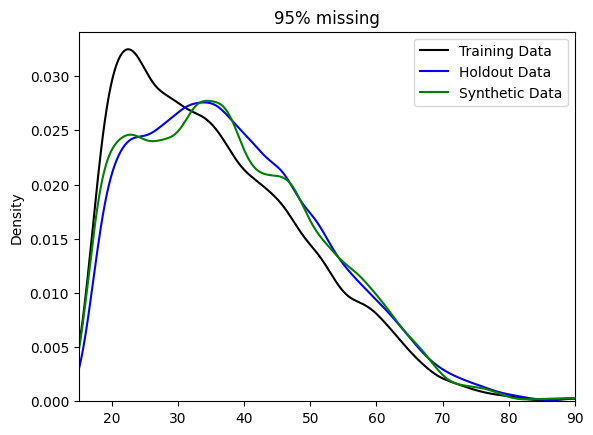

In [26]:
trn['age'].plot(kind='kde',label = 'Training Data', color='black')
val['age'].plot(kind='kde',label = 'Holdout Data', color='blue')
syn['age'].plot(kind='kde',label = 'Synthetic Data', color='green')
plt.legend(loc='upper right')
plt.title('95% missing')
plt.xlim(15, 90)
plt.ylim(0, None)

## Benchmark ML Models

In [11]:
#!pip install sklearn
import lightgbm as lgb
from lightgbm import log_evaluation, early_stopping
from sklearn.model_selection import train_test_split

def prepare_xy(df):
    df = df.copy()
    tgt_col = 'age'
    y = (df[tgt_col]).astype(int)
    str_cols = [col for col in df.select_dtypes(['object', 'string']).columns if col != tgt_col]
    for col in str_cols:
        df[col] = pd.Categorical(df[col])
    cat_cols = [col for col in df.select_dtypes('category').columns if col != tgt_col]
    num_cols = [col for col in df.select_dtypes('number').columns if col != tgt_col]
    for col in num_cols:
        df[col] = df[col].astype('float')
    X = df[cat_cols + num_cols]
    return X, y

def train_model(X, y):
    print(f"Training on {X.shape[0]:,} records")
    cat_cols = list(X.select_dtypes('category').columns)
    X_trn, X_val, y_trn, y_val = train_test_split(X, y, test_size=0.2, random_state=1)
    ds_trn = lgb.Dataset(X_trn, label=y_trn, categorical_feature=cat_cols, free_raw_data=False)
    ds_val = lgb.Dataset(X_val, label=y_val, categorical_feature=cat_cols, free_raw_data=False)
    model = lgb.train(
        num_boost_round=200, 
        params={
            'verbose': -1,
            'metric': 'l1',            # l1
            'objective': 'regression_l1'  # regression_l1
        }, 
        train_set=ds_trn,
        valid_sets=[ds_val],
        callbacks=[early_stopping(5)], #, log_evaluation(100)],
    )
    return model

def evaluate_model(model, hol):
    X_hol, y_hol = prepare_xy(hol)
    y_est = model.predict(X_hol)
    mae = (y_est - y_hol).abs().mean()
    rmse = np.sqrt(((y_est - y_hol)**2).mean())
    return mae, rmse

### Train Model on Actual Training Data

we need to limit to those records that have a non-missing target

In [12]:
trn_X, trn_y = prepare_xy(trn[~trn.age.isna()])
trn_m = train_model(trn_X, trn_y)

Training on 15,210 records
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's l1: 7.57773


### Train Model on Imputed Synthetic Data

In [13]:
syn_X, syn_y = prepare_xy(syn)
syn_m = train_model(syn_X, syn_y)

Training on 24,421 records
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[66]	valid_0's l1: 8.21515


### Evaluate Models on Actual Holdout Samples

In [14]:
mae, rmse = evaluate_model(trn_m, val)
print(f"training  MAE: {mae:.2f}, RMSE: {rmse:.2f}")
mae, rmse = evaluate_model(syn_m, val)
print(f"synthetic MAE: {mae:.2f}, RMSE: {rmse:.2f}")

training  MAE: 7.75, RMSE: 10.41
synthetic MAE: 7.91, RMSE: 10.66


In [15]:
val2 = val[val.education.isin(['Doctorate', 'Prof-school', 'Masters'])]
mae, rmse = evaluate_model(trn_m, val2)
print(f"training  MAE: {mae:.2f}, RMSE: {rmse:.2f}")
mae, rmse = evaluate_model(syn_m, val2)
print(f"synthetic MAE: {mae:.2f}, RMSE: {rmse:.2f}")

training  MAE: 8.05, RMSE: 10.61
synthetic MAE: 8.71, RMSE: 11.45
